# Task 1 – Exploratory Data Analysis (EDA)
This notebook performs the **minimum-essential** EDA requested for Week 3 Task 1:

* Descriptive statistics & missing-value check
* Univariate histograms for numeric features
* Correlation heat-map
* Top-10 categories bar-chart (categorical feature)


In [1]:
# --- Imports & settings ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style("whitegrid")
pd.set_option("display.max_columns", 50)

DATA_PATH = Path("../data/MachineLearningRating_v3.txt")  # adjust as needed
SAMPLE = 50_000  # set to None for full dataset
SEED = 42


In [2]:
# --- Load dataset (auto-detect delimiter) ---
def read_dataset(path: Path) -> pd.DataFrame:
    for sep in ("|", ",", "	"):
        try:
            tmp = pd.read_csv(path, sep=sep, low_memory=False)
            if tmp.shape[1] > 1:  # good split if >1 col
                return tmp
        except Exception:
            pass
    raise ValueError(f"Unable to read {path}. Check delimiter.")

df = read_dataset(DATA_PATH)
print("Loaded shape:", df.shape)

if SAMPLE is not None and SAMPLE < len(df):
    df = df.sample(n=SAMPLE, random_state=SEED)
    print("Sampled rows:", df.shape)


Loaded shape: (1000098, 52)
Sampled rows: (50000, 52)


In [3]:
# --- Descriptive statistics & missing-value report ---
numeric_df = df.select_dtypes(include="number")
display(numeric_df.describe().T)

missing = df.isna().sum().sort_values(ascending=False)
display(missing[missing > 0].to_frame("missing"))


,count,mean,std,min,25%,50%,75%,max
UnderwrittenCoverID,50000.0,1.046773e+05,6.338887e+04,1.000000e+00,5.489975e+04,9.395850e+04,1.390240e+05,3.011580e+05
PolicyID,50000.0,7.927284e+03,5.293233e+03,1.400000e+01,4.426000e+03,7.071000e+03,1.104600e+04,2.324500e+04
PostalCode,50000.0,3.039378e+03,2.668859e+03,1.000000e+00,7.427500e+02,2.000000e+03,4.309000e+03,9.870000e+03
mmcode,49979.0,5.482832e+07,1.367371e+07,4.042080e+06,6.005692e+07,6.005842e+07,6.005842e+07,6.506535e+07
RegistrationYear,50000.0,2.010233e+03,3.244663e+00,1.995000e+03,2.008000e+03,2.011000e+03,2.013000e+03,2.015000e+03
Cylinders,49979.0,4.044979e+00,2.919165e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,1.000000e+01
cubiccapacity,49979.0,2.468687e+03,4.501671e+02,0.000000e+00,2.237000e+03,2.694000e+03,2.694000e+03,1.288000e+04
kilowatts,49979.0,9.725937e+01,1.941405e+01,0.000000e+00,7.500000e+01,1.110000e+02,1.110000e+02,3.090000e+02
NumberOfDoors,49979.0,4.024550e+00,4.577660e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00
CustomValueEstimate,10923.0,2.225781e+05,4.830768e+05,2.000000e+04,1.351000e+05,2.277000e+05,2.805000e+05,2.655000e+07


,missing
NumberOfVehiclesInFleet,50000
CrossBorder,49964
CustomValueEstimate,39077
Rebuilt,32242
Converted,32242
WrittenOff,32242
NewVehicle,7803
Bank,7356
AccountType,2023
Gender,444


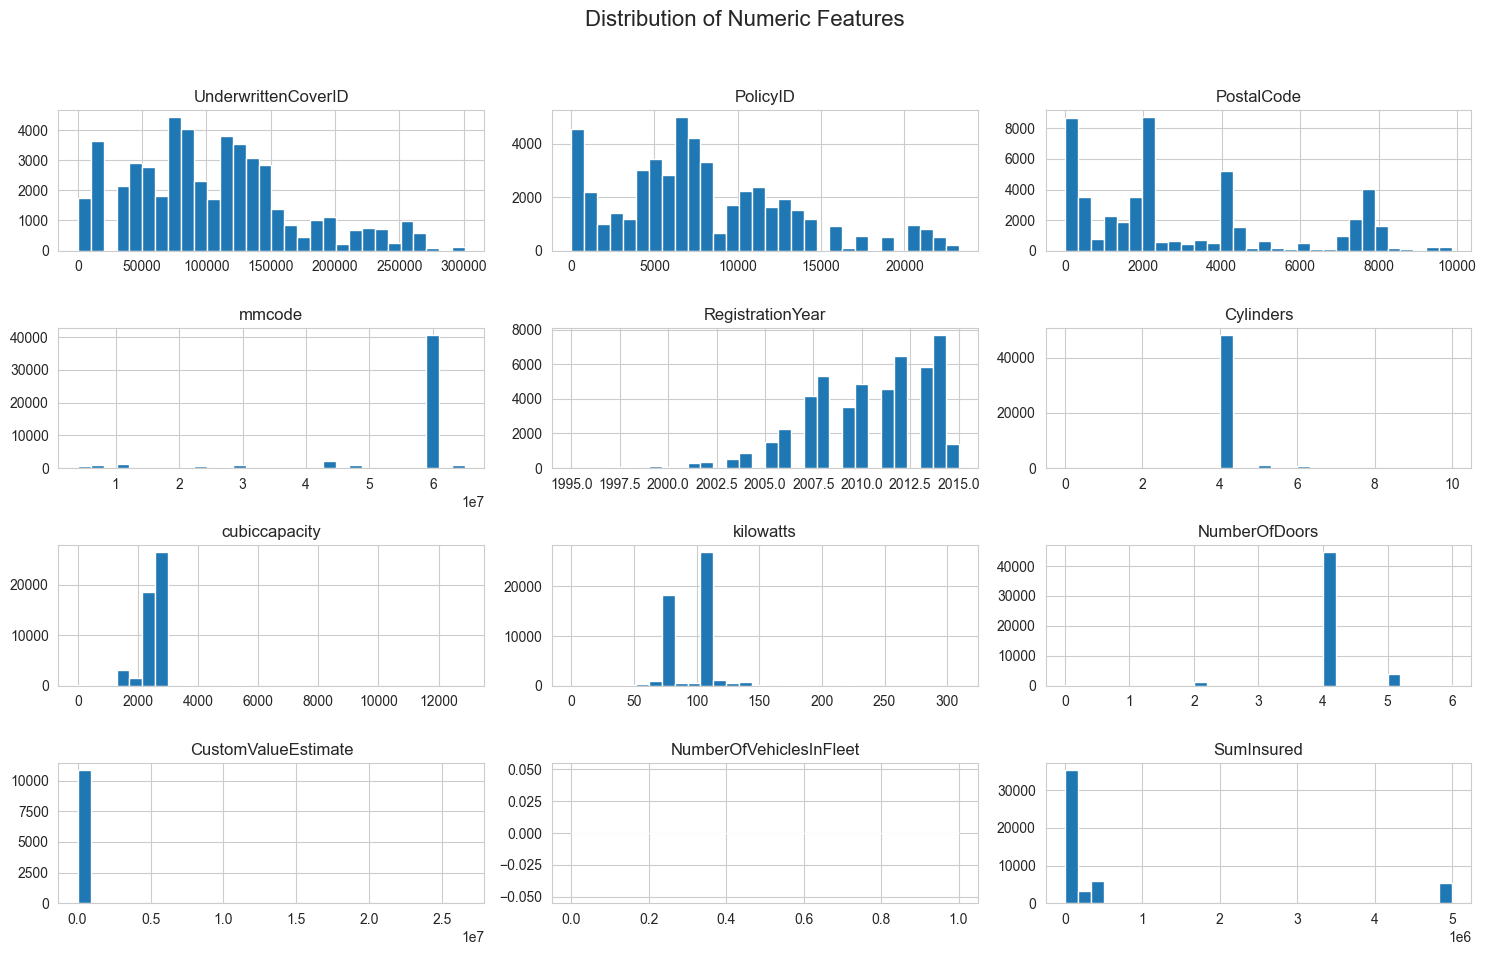

In [4]:
# --- Histogram grid (first 12 numeric cols) ---
cols = numeric_df.columns[:12]
if not cols.empty:
    numeric_df[cols].hist(bins=30, figsize=(15, 10))
    plt.suptitle("Distribution of Numeric Features", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


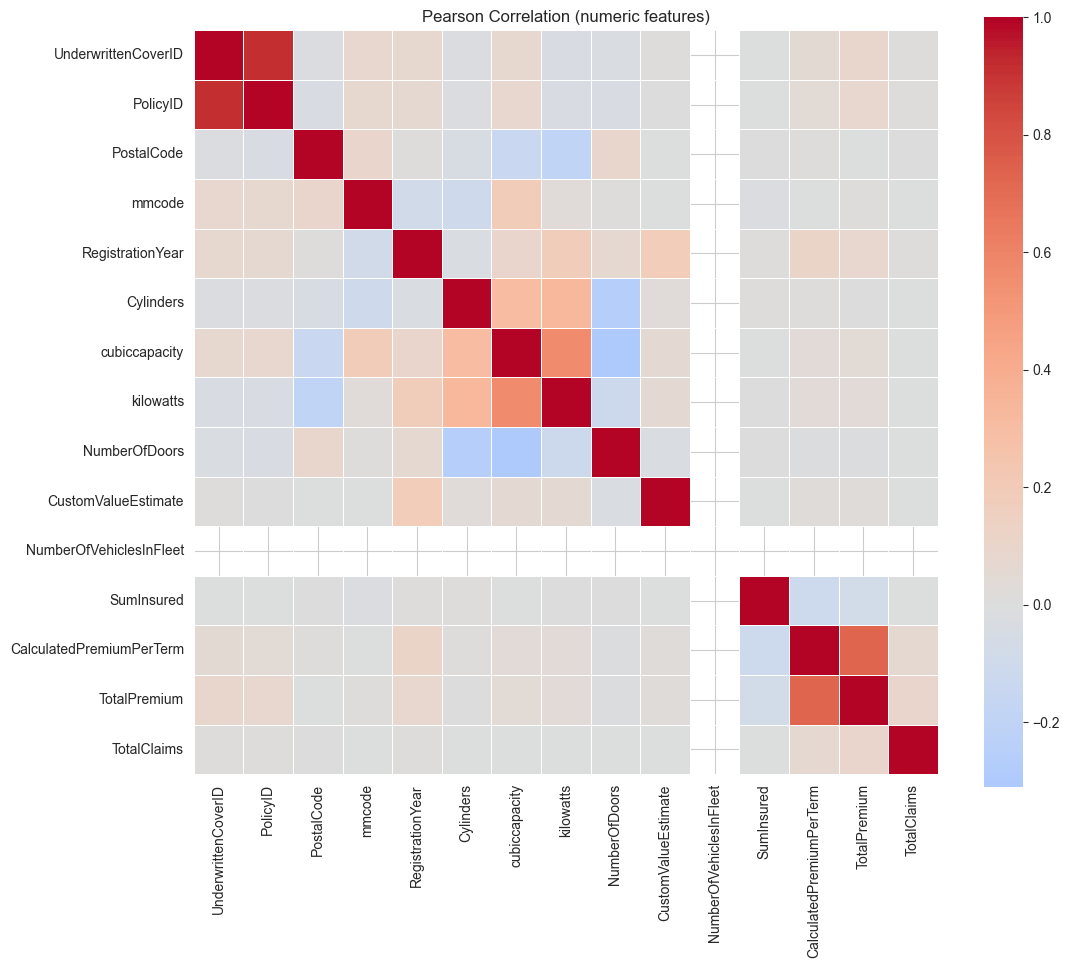

In [5]:
# --- Correlation heat-map ---
if numeric_df.shape[1] > 1:
    corr = numeric_df.corr(numeric_only=True)
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, cmap="coolwarm", center=0, square=True, linewidths=0.5)
    plt.title("Pearson Correlation (numeric features)")
    plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_21852\882427578.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counts.values, y=top_counts.index, palette="viridis")


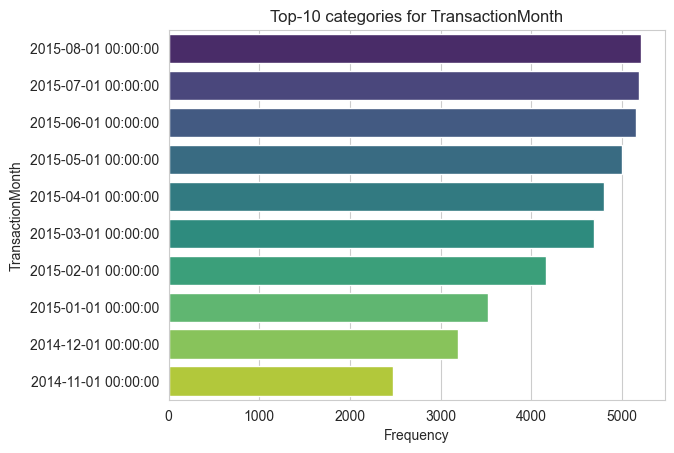

In [6]:
# --- Top-10 categories bar chart ---
cat_cols = [c for c in df.select_dtypes(include="object").columns if df[c].nunique() <= 30]
if cat_cols:
    top_col = cat_cols[0]
    top_counts = df[top_col].value_counts().head(10)
    sns.barplot(x=top_counts.values, y=top_counts.index, palette="viridis")
    plt.xlabel("Frequency")
    plt.ylabel(top_col)
    plt.title(f"Top-10 categories for {top_col}")
    plt.show()
